<a href="https://colab.research.google.com/github/okellyson/CPA-EFC1/blob/master/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**:

**Matricula**

**Turma**: 10A, 14A

Link do repositório GitHub: https://github.com/okellyson/CPA-EFC1

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import sys
# Variaveis
randomize = True
sys.setrecursionlimit(1000000)

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [ ]:
def insertion_sort(array):
    comparacoes = 1 
    for i in range(2, len(array)):
        comparacoes += 1
        key_item = array[i]
        j = i - 1
        while j >= 0 and array[j] > key_item:
            comparacoes += 1
            array[j + 1] = array[j]
            j -= 1
        array[j + 1] = key_item
    return (array,comparacoes)

##  Merge Sort


In [ ]:
class mergSortClass:

    def __init__(self):
        self.comparacoes = 0

    def merge(self,left, right):

        self.comparacoes += 1
        
        if len(left) == 0:
            return right

        if len(right) == 0:
            return left

        result = []

        if left[0] < right[0]:
            result.extend(left)
            result.extend(right)
        else:
            result.extend(right)
            result.extend(left)

        return result

    def mergeSort(self,array):

        if len(array) < 2:
            return array

        midpoint = len(array) // 2

        return self.merge(
            left=self.mergeSort(array[:midpoint]),
            right=self.mergeSort(array[midpoint:])
          )

##  Selection Sort


In [ ]:
def selection_sort(array):
    comparacoes = 1
    for step in range(len(array)):
        min_idx = step
        comparacoes +=1
        for i in range(step + 1, len(array)):
            comparacoes +=1
            if array[i] < array[min_idx]:
                min_idx = i
         
        (array[step], array[min_idx]) = (array[min_idx], array[step])
    return array,comparacoes

##  Bubble Sort


In [ ]:
def bubble_sort(array):
    comparacoes = 1
    exchanges = True
    passnum = len(array)-1
    while passnum > 0 and exchanges:
       comparacoes += 1
       exchanges = False
       for i in range(passnum):
           comparacoes +=1
           if array[i]>array[i+1]:
               exchanges = True
               temp = array[i]
               array[i] = array[i+1]
               array[i+1] = temp
       passnum = passnum-1
    return array, comparacoes

## Heap Sort

In [ ]:
class heapSortClass:

	def __init__(self):
		self.comparacoes = 0	

	def heapify(self,arr, n, i):

		largest = i
		l = 2 * i + 1	
		r = 2 * i + 2	

		if l < n and arr[largest] < arr[l]:

			self.comparacoes += 1
			largest = l

		if r < n and arr[largest] < arr[r]:

			self.comparacoes += 1
			largest = r

		if largest != i:

			self.comparacoes+=1
			arr[i], arr[largest] = arr[largest], arr[i] 
			self.heapify(arr, n, largest)

	def heapSort(self,arr):

		self.comparacoes += 1

		n = len(arr)
	
		for i in range(n//2 - 1, -1, -1):
			self.heapify(arr, n, i)
	 
		for i in range(n-1, 0, -1):
			arr[i], arr[0] = arr[0], arr[i] 
			self.heapify(arr, i, 0)
	 
def RunHS(array):

    lst = array
    heapsort = heapSortClass()
		
    return heapsort.heapSort(lst),heapsort.comparacoes

## Quick Sort

> pivo = *A[A-comprimento]*

In [ ]:
class QuickSort:

    def __init__(self):
        self.comparacoes = 0

    def sort(self, lst):

        if len(lst) <= 1:
            self.comparacoes += 1
            return lst

        pivot_idx = len(lst) -1
        smaller, larger = [], []

        for idx, num in enumerate(lst):

            self.comparacoes += 1
            
            if idx != pivot_idx:
                (larger, smaller)[num < lst[pivot_idx]].append(num)
        return self.sort(smaller) + [lst[pivot_idx]] + self.sort(larger)

def RunQS(array):
    lst = array
    quicksort = QuickSort()
    return quicksort.sort(lst),quicksort.comparacoes

Gerador de array


In [ ]:
def generateArray(size, rand, invert):
  array = list(range(size))
  if(rand):
    random.shuffle(array)
  if(invert):
    array.reverse()
  return array

In [ ]:
def generateArrayHeapified(size):
  array = list(range(size))
  n=len(array)
  for i in range(n // 2 - 1, -1, -1):
        heapify(array, n, i)
  return array

In [ ]:
colorArray = ['green','red','blue']
def plot(compArray, title):
  pltAux = plt;
  for i in range(len(compArray)):
    pltAux.plot(compArray[i], color=colorArray[i])
  pltAux.grid(True)
  pltAux.ylabel("Comparacoes")
  pltAux.suptitle(title)
  pltAux.legend(["Melhor Caso","Pior Caso","Caso Aleatorio"],title="legend")

In [ ]:
def makeGraphic(algo, title):
  melhorCaso = []
  piorCaso = []
  casoAleatorio = []
  for size in range(5, 1001, 5):
    melhorCaso.append(algo(generateArray(size, False, False))[1])
  for size in range(5, 1001, 5):
    piorCaso.append(algo(generateArray(size, False, True))[1])
  for size in range(5, 1001, 5):
    casoAleatorio.append(algo(generateArray(size, True, False))[1])

  plot([melhorCaso,piorCaso,casoAleatorio],title)

In [ ]:
def makeGraphicHeap(algo, title):
  melhorCaso = []
  piorCaso = []
  casoAleatorio = []
  for size in range(5, 1001, 5):
    melhorCaso.append(algo(generateArrayHeapified(size))[1])
  for size in range(5, 1001, 5):
    piorCaso.append(algo(generateArray(size, False, False))[1])
  for size in range(5, 1001, 5):
    casoAleatorio.append(algo(generateArray(size, True, False))[1])

  plot([melhorCaso,piorCaso,casoAleatorio],title)

def heapify(arr, n, i):
		largest = i
		l = 2 * i + 1	
		r = 2 * i + 2	

		if l < n and arr[largest] < arr[l]:
			largest = l
		if r < n and arr[largest] < arr[r]:
			largest = r
		if largest != i:
			arr[i], arr[largest] = arr[largest], arr[i] 
			heapify(arr, n, largest)

In [ ]:
def makeGraphicQuick(algo, title):
  melhorCaso = []
  piorCaso = []
  for size in range(5, 1001, 5):
    melhorCaso.append(algo(generateArray(size, False, False))[1])
  for size in range(5, 1001, 5):
    piorCaso.append(algo(generateArray(size, False, True))[1])

  plot([melhorCaso,piorCaso],title)

In [ ]:
def RunMerge(array):
    lst = array
    mergesort = mergSortClass()

    arrei = mergesort.mergeSort(lst)
    #print(mergesort.comparacoes)
    
    return arrei,mergesort.comparacoes

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





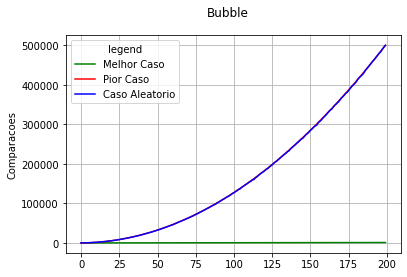

In [ ]:
makeGraphic(bubble_sort,'Bubble')
## Melhor caso : Ω(n) -> array em ordem crescente
## Pior caso : O(n²) -> array em ordem decrescente
## Caso aleatório : Θ(n²)

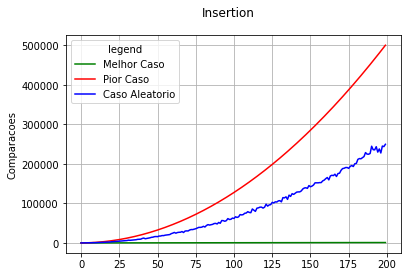

In [ ]:
makeGraphic(insertion_sort,'Insertion')
## Melhor caso : Ω(n) -> array em ordem crescente
## Pior caso : O(n²) -> array em ordem decrescente
## Caso aleatório : Θ(n²) 

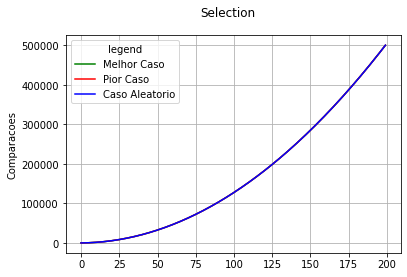

In [ ]:
makeGraphic(selection_sort,'Selection')
## Melhor caso, Pior caso, Caso aleatório : O(n²) -> qualquer array

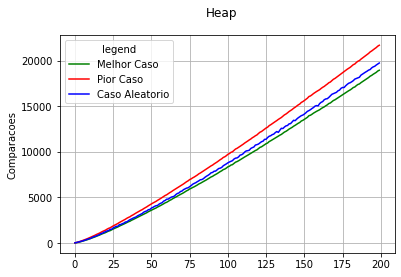

In [ ]:
makeGraphicHeap(RunHS,'Heap')
## Melhor caso : Θ(n log n) -> array em forma de maxHeap
## Pior caso : Θ(n log n) -> array em ordem crescente
## Caso aleatório : Θ(n log n) 

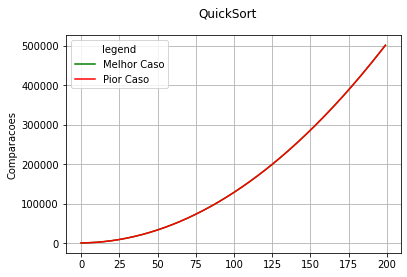

In [ ]:
makeGraphicQuick(RunQS,'QuickSort')
## Melhor caso : Θ(n log n)
## Pior caso : O(n²)
## Caso aleatório : Θ(n log n)

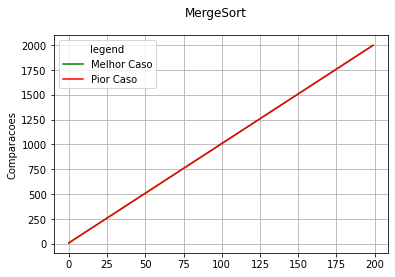

In [ ]:
makeGraphicQuick(RunMerge,'MergeSort')
## Melhor caso : Θ(n log n) => qualquer array 
## Pior caso : Θ(n log n) => qualquer array 

2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [ ]:
class QuickSort2:
    def __init__(self):
        self.comparacoes = 0

    def sort(self, lst):
        if len(lst) <= 1:
            self.comparacoes += 1
            return lst
        pivot_idx = random.randrange(0,len(lst)-1)
        smaller, larger = [], []
        for idx, num in enumerate(lst):
            self.comparacoes += 1
            if idx != pivot_idx:
                (larger, smaller)[num < lst[pivot_idx]].append(num)
        return self.sort(smaller) + [lst[pivot_idx]] + self.sort(larger)

def RunQS2(array):
    lst = array
    quicksort = QuickSort2()
    return quicksort.sort(lst),quicksort.comparacoes

In [ ]:
colorArray2=['Green','DarkGreen','LightGreen','Blue','DarkBlue','LightBlue']
def plot2(compArray, title):
  pltAux = plt;
  for i in range(len(compArray)):
    pltAux.plot(compArray[i], color=colorArray2[i])
  pltAux.grid(True)
  pltAux.ylabel("Comparacoes")
  pltAux.suptitle(title)
  pltAux.legend(["QSFixo crescente","QSFixo decrescente","QSFixo aleatorio","QSAleatorio crescente","QSAleatoriodecrescente","QSAleatorio aleatorio"],title="legend")

In [ ]:
def makeGraphicQSvs(title):
  quickSortPivoFixoCrescente = []
  quickSortPivoFixoDrescente = []
  quickSortPivoFixoAleatorio = []
  quickSortPivoAleatorioCrescente = []
  quickSortPivoAleatorioDrescente = []
  quickSortPivoAleatorioAleatorio = []
  for size in range(5, 1001, 5):
    quickSortPivoFixoCrescente.append(RunQS(generateArray(size, False, False))[1])
  for size in range(5, 1001, 5):
    quickSortPivoFixoDrescente.append(RunQS(generateArray(size, False, True))[1])
  for size in range(5, 1001, 5):
    quickSortPivoFixoAleatorio.append(RunQS(generateArray(size, True, False))[1])
  for size in range(5, 1001, 5):
    quickSortPivoAleatorioCrescente.append(RunQS2(generateArray(size, False, False))[1])
  for size in range(5, 1001, 5):
    quickSortPivoAleatorioDrescente.append(RunQS2(generateArray(size, False, True))[1])
  for size in range(5, 1001, 5):
    quickSortPivoAleatorioAleatorio.append(RunQS2(generateArray(size, True, False))[1])


  plot2([quickSortPivoFixoCrescente,quickSortPivoFixoDrescente,quickSortPivoFixoAleatorio,quickSortPivoAleatorioCrescente,quickSortPivoAleatorioDrescente,quickSortPivoAleatorioAleatorio],title)

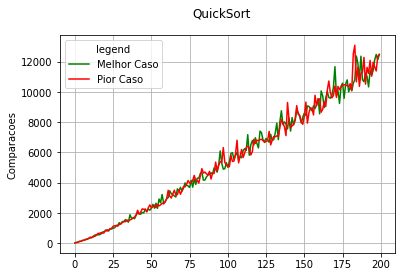

In [ ]:
makeGraphicQuick(RunQS2,'QuickSort')

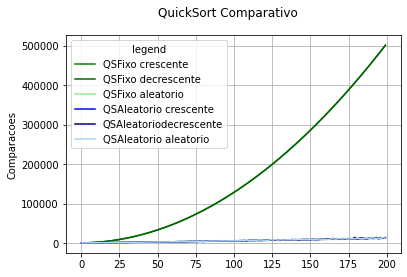

In [ ]:
makeGraphicQSvs('QuickSort Comparativo')